# Notebook to visualize location data

In [1]:
import csv

In [2]:
# count the number of Starbucks in DC
with open('starbucks.csv') as file:
    csvinput = csv.reader(file)

    acc = 0
    for record in csvinput:
        if 'DC' in record[3]:
            acc += 1
        
print( acc )

75


In [3]:
def parse_locations(csv_iterator,state=''):
    """ strip out long/lat and convert to a list of floating point 2-tuples --
        optionally, filter by a specified state """
    return [ ( float(row[0]), float(row[1])) for row in csv_iterator 
            if state in row[3]]

def get_locations(filename, state=''):
    """ read a list of longitude/latitude pairs from a csv file, 
        optionally, filter by a specified state """
    with open(filename, 'r') as input_file:
        csvinput = csv.reader(input_file)
        location_data = parse_locations(csvinput,state)
    return location_data

In [4]:
# get the data from all starbucks locations
starbucks_locations = get_locations('starbucks.csv')
# get the data from burger locations"
burger_locations = get_locations('burgerking.csv') + \
                   get_locations('mcdonalds.csv') + \
                   get_locations('wendys.csv')

In [5]:
# look at the first few (10) data points of each
for n in range(10):
    print( starbucks_locations[n] )
    
print()    
    
for n in range(10):
    print( burger_locations[n] )    

(-159.459214, 21.879285)
(-159.380923, 21.97116)
(-159.375636, 21.971295)
(-159.34927, 21.979465)
(-159.315957, 22.078248)
(-158.18458, 21.434788)
(-158.116013, 21.343991)
(-158.08179, 21.3341)
(-158.061706, 21.648414)
(-158.058557, 21.483994)

(-149.95032, 61.13782)
(-149.909, 61.19542)
(-149.88789, 61.21743)
(-149.86801, 61.18736)
(-149.86568, 61.14431)
(-149.83383, 61.18072)
(-149.81281, 61.21526)
(-149.77812, 61.19598)
(-149.57101, 61.32533)
(-149.8196, 61.27584)


In [6]:
# a common, powerful plotting library
import matplotlib.pyplot as plt

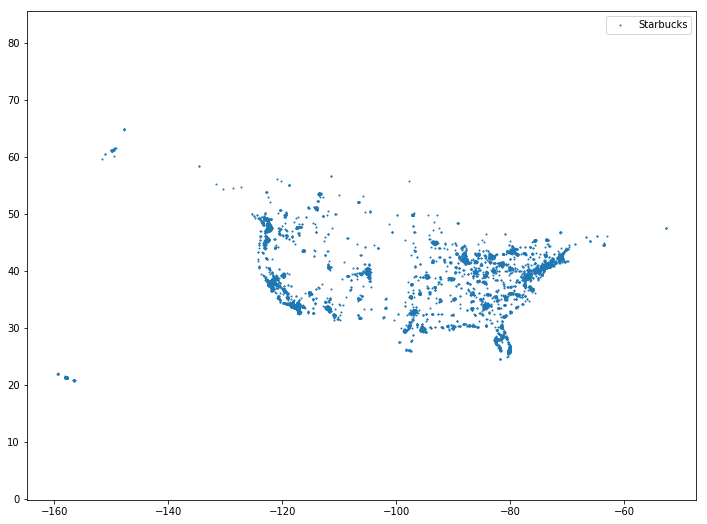

In [7]:
# set figure size
plt.figure(figsize=(12, 9))

# get the axes of the plot and set them to be equal-aspect and limited (specify bounds) by data
ax = plt.axes()
ax.set_aspect('equal', 'datalim')

# plot the data
plt.scatter(*zip(*starbucks_locations), s=1)

plt.legend(["Starbucks"])

# jupyter automatically plots this inline. On the console, you need to invoke plt.show()
# FYI: In that case, execution halts until you close the window it opens.

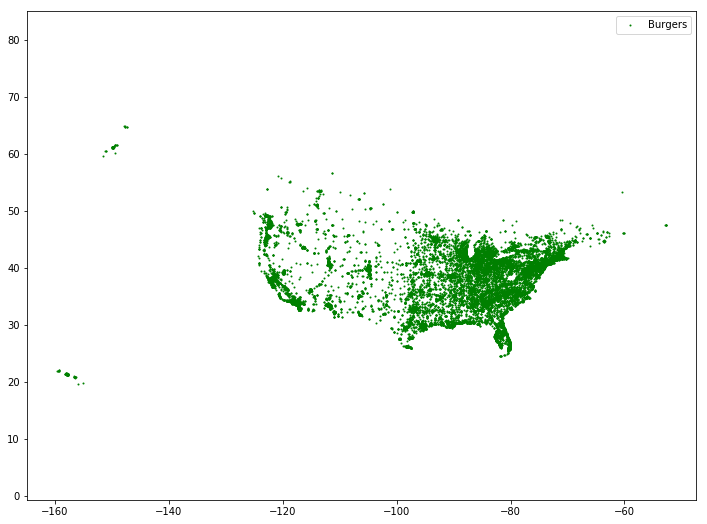

In [8]:
# set figure size
plt.figure(figsize=(12, 9))

# get the axes of the plot and set them to be equal-aspect and limited (specify bounds) by data
ax = plt.axes()
ax.set_aspect('equal', 'datalim')

# plot the data
plt.scatter(*zip(*burger_locations), color='green', s=1)

plt.legend(["Burgers"])

In [9]:
lat, lon = zip(*get_locations('burgerking.csv'))

min_lat = min(lat)
max_lat = max(lat)
min_lon = min(lon)
max_lon = max(lon)

lat, lon = zip(*get_locations('mcdonalds.csv'))

min_lat = min(min_lat,min(lat))
max_lat = max(max_lat,max(lat))
min_lon = min(min_lon,min(lon))
max_lon = max(max_lon,max(lon))

lat, lon = zip(*get_locations('wendys.csv'))

min_lat = min(min_lat,min(lat))
max_lat = max(max_lat,max(lat))
min_lon = min(min_lon,min(lon))
max_lon = max(max_lon,max(lon))

lat, lon = zip(*get_locations('pizzahut.csv'))

min_lat = min(min_lat,min(lat))
max_lat = max(max_lat,max(lat))
min_lon = min(min_lon,min(lon))
max_lon = max(max_lon,max(lon))


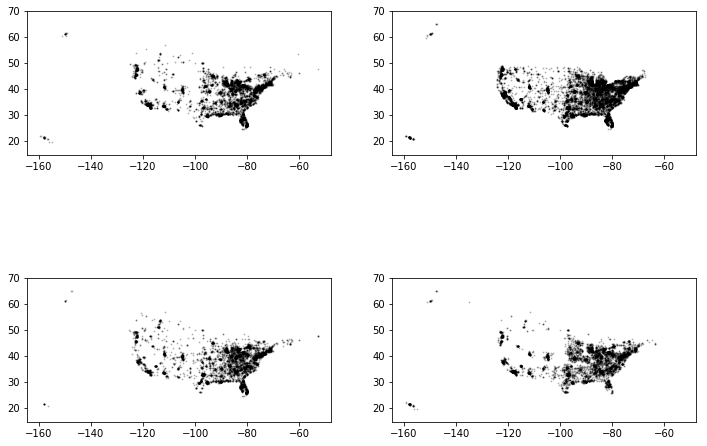

In [10]:
# set figure size
fig = plt.figure(figsize=(12, 9))
#fig = plt.figure()




plt.subplot(2,2,1)
plt.scatter(*zip(*get_locations('burgerking.csv')), color='black', s=1, alpha=0.2)
plt.xlim(min_lat-5,max_lat+5)
plt.ylim(min_lon-5,max_lon+5)
plt.gca().set_aspect('equal')
plt.subplot(2,2,2)
plt.scatter(*zip(*get_locations('mcdonalds.csv')), color='black', s=1, alpha=0.2)
plt.xlim(min_lat-5,max_lat+5)
plt.ylim(min_lon-5,max_lon+5)
plt.gca().set_aspect('equal')
plt.subplot(2,2,3)
plt.scatter(*zip(*get_locations('wendys.csv')), color='black', s=1, alpha=0.2)
plt.xlim(min_lat-5,max_lat+5)
plt.ylim(min_lon-5,max_lon+5)
plt.gca().set_aspect('equal')
plt.subplot(2,2,4)
plt.scatter(*zip(*get_locations('pizzahut.csv')), color='black', s=1, alpha=0.2)
plt.xlim(min_lat-5,max_lat+5)
plt.ylim(min_lon-5,max_lon+5)
plt.gca().set_aspect('equal')

#plt.scatter(*zip(*get_locations('dollar-tree.csv')), color='black', s=1, alpha=0.2)

In [11]:
# get the starbucks in DC
starbucks_dc_locations = get_locations('starbucks.csv', state='DC')

burger_dc_locations = get_locations('burgerking.csv', state='DC') + \
                      get_locations('mcdonalds.csv', state='DC') + \
                      get_locations('wendys.csv', state='DC')

In [12]:
# show the first 10 locations of each:
for n in range(10):
    print( starbucks_dc_locations[n] )
    
print()    
    
for n in range(min(10,len(burger_dc_locations))):
    print( burger_dc_locations[n] )
    

(-77.102842, 38.926656)
(-77.095791, 38.91756)
(-77.095684, 38.944565)
(-77.085464, 38.960783)
(-77.084843, 38.933583)
(-77.079661, 38.948279)
(-77.07613, 38.912007)
(-77.074559, 38.963113)
(-77.073222, 38.935104)
(-77.071562, 38.920283)

(-77.06535, 38.947)
(-77.04546, 38.90951)
(-77.04172, 38.92349)
(-77.03727, 38.90221)
(-77.03613, 38.97252)
(-77.02283, 38.92583)
(-77.01903, 38.89839)
(-77.01655, 38.84225)
(-77.00158, 38.90777)
(-77.08684, 38.9384)


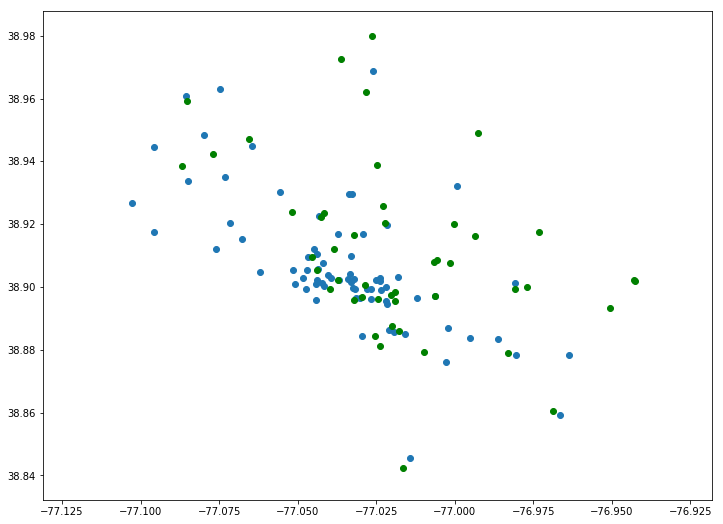

In [13]:
# set figure size
plt.figure(figsize=(12, 9))

# get the axes of the plot and set them to be equal-aspect and limited by data
ax = plt.axes()
ax.set_aspect('equal', 'datalim')

# plot the data
plt.scatter(*zip(*starbucks_dc_locations))
plt.scatter(*zip(*burger_dc_locations), color='green')

In [14]:
# We also want to plot the DC boundaries, so we have a better idea where these things are
# the data is contained in DC.txt

# let's inspect it. Observe the format
with open('DC.txt') as file:
    for line in file:
        print(line,end='') # lines already end with a newline so don't print another

 -77.120201   38.791401
 -76.909706   38.994400
1

District of Columbia
DC
25
 -77.120201   38.934200
 -77.042305   38.994400
 -77.036400   38.991402
 -77.008301   38.969601
 -76.909706   38.892700
 -77.038902   38.791401
 -77.036102   38.814800
 -77.040703   38.821602
 -77.039505   38.832100
 -77.045197   38.834599
 -77.046303   38.841202
 -77.033104   38.841599
 -77.031998   38.850399
 -77.038101   38.861801
 -77.042908   38.863400
 -77.039200   38.865700
 -77.040901   38.871101
 -77.045708   38.875099
 -77.046600   38.871201
 -77.049400   38.870602
 -77.054398   38.879002
 -77.058556   38.879955
 -77.068504   38.899700
 -77.090508   38.904099
 -77.101501   38.910999



In [15]:
with open('DC.txt') as file:
    # get the lower left and upper right coords for the bounding box
    ll_long, ll_lat = map(float, next(file).split())
    ur_long, ur_lat = map(float, next(file).split())
    # get the number of regions 
    num_records = int(next(file))
    # there better just be one
    assert num_records == 1
    # then a blank line
    next(file)
    # Title of "county"
    county_name = next(file).rstrip() # removes newline at end
    # "State" county resides in
    state_name = next(file).rstrip()
    # this is supposed to be DC
    assert state_name == "DC"
    # number of points to expect
    num_pairs = int(next(file))
    dc_boundary = [ tuple(map(float,next(file).split())) for n in range(num_pairs)]
    


In [16]:
dc_boundary

[(-77.120201, 38.9342),
 (-77.042305, 38.9944),
 (-77.0364, 38.991402),
 (-77.008301, 38.969601),
 (-76.909706, 38.8927),
 (-77.038902, 38.791401),
 (-77.036102, 38.8148),
 (-77.040703, 38.821602),
 (-77.039505, 38.8321),
 (-77.045197, 38.834599),
 (-77.046303, 38.841202),
 (-77.033104, 38.841599),
 (-77.031998, 38.850399),
 (-77.038101, 38.861801),
 (-77.042908, 38.8634),
 (-77.0392, 38.8657),
 (-77.040901, 38.871101),
 (-77.045708, 38.875099),
 (-77.0466, 38.871201),
 (-77.0494, 38.870602),
 (-77.054398, 38.879002),
 (-77.058556, 38.879955),
 (-77.068504, 38.8997),
 (-77.090508, 38.904099),
 (-77.101501, 38.910999)]

In [17]:
# add the beginning to the end so that it closes up
dc_boundary.append(dc_boundary[0])

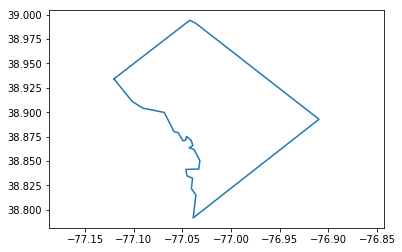

In [18]:
# draw it!

ax = plt.axes()
ax.set_aspect('equal', 'datalim')

plt.plot(*zip(*dc_boundary))

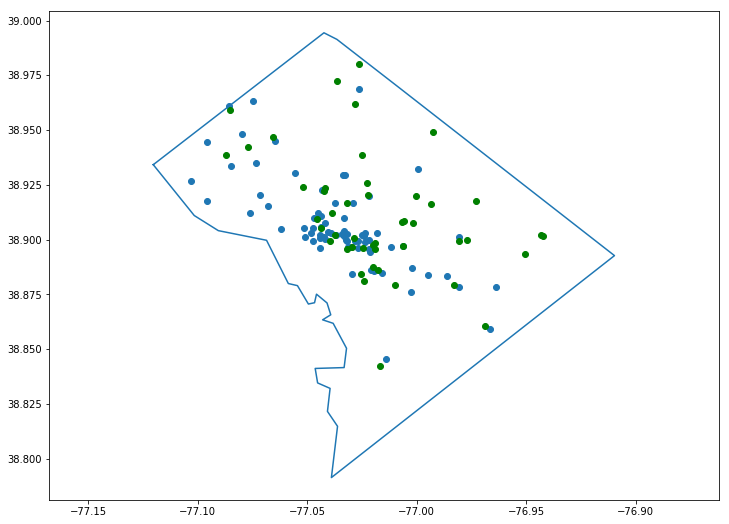

In [19]:
# draw both the starbucks location and DC boundary together

plt.figure(figsize=(12, 9))

ax = plt.axes()
ax.set_aspect('equal', 'datalim')

plt.scatter(*zip(*starbucks_dc_locations))
plt.scatter(*zip(*burger_dc_locations), color='green')
plt.plot(*zip(*dc_boundary))

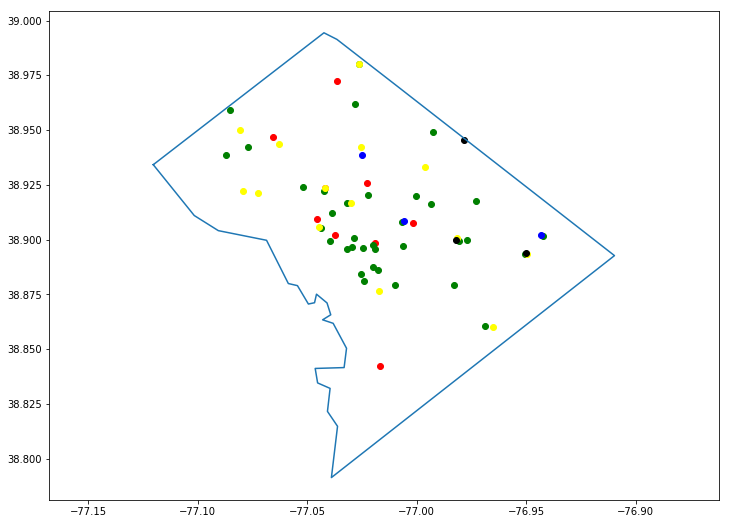

In [20]:
# draw both the starbucks location and DC boundary together

plt.figure(figsize=(12, 9))

ax = plt.axes()
ax.set_aspect('equal', 'datalim')

plt.scatter(*zip(*get_locations('burgerking.csv', state='DC')), color='red')
plt.scatter(*zip(*get_locations('mcdonalds.csv', state='DC')), color='green')
plt.scatter(*zip(*get_locations('wendys.csv', state='DC')), color='blue')
plt.scatter(*zip(*get_locations('pizzahut.csv', state='DC')), color='yellow')

plt.scatter(*zip(*get_locations('dollar-tree.csv', state='DC')), color='black')
plt.plot(*zip(*dc_boundary))

### But where's AU?

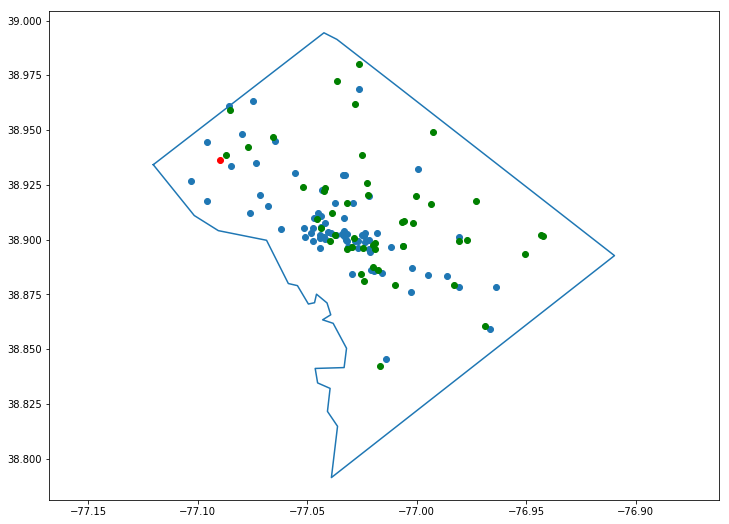

In [21]:
# draw both the starbucks location and DC boundary together

plt.figure(figsize=(12, 9))

ax = plt.axes()
ax.set_aspect('equal', 'datalim')

plt.scatter(*zip(*starbucks_dc_locations))
plt.scatter(*zip(*burger_dc_locations), color='green')
plt.plot(*zip(*dc_boundary))

# add a red dot right over Anderson
plt.scatter([-77.0897511],[38.9363019],color='red')

In [22]:
from ipyleaflet import Map, basemaps, basemap_to_tiles, Marker, CircleMarker

m = Map(layers=(basemap_to_tiles(basemaps.OpenStreetMap.HOT), ),
        center=(38.898082, -77.036696),
        zoom=11)

# marker for AU
marker = Marker(location=(38.937831, -77.088852), radius=2, color='green')
m.add_layer(marker)

for (long,lat) in starbucks_dc_locations:
    marker = CircleMarker(location=(lat,long), radius=1, color='steelblue')
    m.add_layer(marker);

for (long,lat) in burger_dc_locations:
    marker = CircleMarker(location=(lat,long), radius=1, color='green')
    m.add_layer(marker);
    
    

m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …